# Predicting ontology definitions and relationships using LLMs

This notebook contains the methods for analyzing the results of the prediction tasks.

See [Makefile](Makefile) for how the results were generated

In [1]:
# initial imports
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yaml
import glob

## Loading YAML result objects

Each run generates a single yaml object

In [2]:
def get_method(obj):
    if obj.get("generate_background"):
        return "background"
    additional = obj.get("additional_collections", [])
    if additional:
        assert len(additional) == 1
        x = additional[0]
        if x.startswith("gh_"):
            return "github"
        elif x.startswith("devdocs"):
            return "devdocs"
        else:
            assert False
    else:
        return "direct"

def load_results(f):
    """Loads main results summaries"""
    obj = yaml.safe_load(open(f))
    ont = obj["source_collection"].replace("ont_", "")
    for k, v in obj["results"].items():
        obj[k] = v
    del obj["results"]
    obj["task"] = " ".join(obj["fields_to_predict"])
    obj["ontology"] = ont
    #additional = obj.get("additional_collections", [])
    #is_github = any(x for x in additional if x.startswith("gh_")) if additional else []
    #obj["method"] = "background" if obj.get("generate_background") else ("github" if is_github else "direct")
    obj["method"] = get_method(obj)
    return obj

from pathlib import Path
def load_granular_results():
    files = glob.glob("results/*.results.tsv")
    dfs = []
    for file in files:
        yaml_path = file.replace(".tsv", ".yaml")
        if not Path(yaml_path).exists():
            continue
        meta = yaml.safe_load(open(yaml_path))
        # print(file)
        res = pd.read_csv(file, comment="#", sep="\t")
        #res['task'] = res.apply(lambda row :  " ".join(row.get("fields_to_predict", [])), axis = 1)
        #res['ontology'] = res.apply(lambda row :  row.get("source_collection", "").replace("ont_", ""), axis = 1)
        res['task'] =  " ".join(meta.get("fields_to_predict"))
        res['ontology'] = meta.get("source_collection", "").replace("ont_", "")
        res["method"] = get_method(meta)
        res["model_name"] = meta["model_name"]
        res["accuracy"] = res["metric_accuracy"]
        dfs.append(res)
    return pd.concat(dfs)

all_df = load_granular_results()
all_df.describe(include='all')

,masked_id,expected_label,feature_definition,feature_aliases,feature_relationships,feature_logical_definition,masked_original_id,predicted_label,metric_precision,metric_recall,...,task,ontology,method,model_name,accuracy,feature_label,expected_relationships,predicted_relationships,expected_definition,predicted_definition
count,6950,2070,3568,0.0,4880,1772,6950,2061,6950.000000,6950.000000,...,6950,6950,6950,6950,6950.00000,4880,2070,2040,2492,2516
unique,490,490,432,NaN,424,122,490,1261,NaN,NaN,...,3,10,4,3,NaN,490,424,1390,432,2173
top,LungMigratoryDendriticCell,lung migratory dendritic cell,A dendritic cell that captures antigens in a l...,NaN,"[{'predicate': 'subClassOf', 'target': 'Functi...","[{'predicate': 'rdfs:subClassOf', 'target': 'F...",CL:4033045,The Thing,NaN,NaN,...,definition,cl,direct,gpt-3.5-turbo,NaN,matrix D2 medium spiny neuron,"[{'predicate': 'subClassOf', 'target': 'Functi...","[{'predicate': 'subClassOf', 'target': 'Functi...",The region of the body adjacent to the pericar...,.
freq,18,5,10,NaN,120,18,18,8,NaN,NaN,...,2810,900,4310,2850,NaN,13,50,37,9,17
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231201,0.236945,...,NaN,NaN,NaN,NaN,0.21524,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400620,0.406892,...,NaN,NaN,NaN,NaN,0.38636,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.500000,...,NaN,NaN,NaN,NaN,0.25000,NaN,NaN,NaN,NaN,NaN


In [3]:
import glob

def load_all_results():
    files = glob.glob("results/*.results.yaml")
    objs = [load_results(f) for f in files]
    return objs

objs = load_all_results()
len(objs)
    

142

In [4]:
df = pd.DataFrame(objs)
df = df.query("model_name != 'llama2'") # incomplete
df.describe(include="all")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,recall,f1_score,accuracy,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology
count,142,142,142,142,142,142,142,142,142,142,...,142.000000,142.000000,142.000000,142.0,142.000000,142.0,142.000000,142.000000,142,142
unique,3,1,2,142,142,1,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10
top,gpt-3.5-turbo,openai:,False,2023-09-04 13:31:12.160393,2023-09-04 13:32:28.413164,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,definition,cl
freq,58,142,98,1,1,142,142,142,88,142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,18
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.235426,0.227812,0.213708,0.0,15.154930,0.0,44.619718,41.056338,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.191490,0.185105,0.177191,0.0,14.005215,0.0,19.888959,14.984046,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,8.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.060000,0.060000,0.060000,0.0,3.000000,0.0,34.000000,31.250000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.196319,0.184702,0.160000,0.0,12.500000,0.0,42.000000,40.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.395000,0.380000,0.359917,0.0,26.000000,0.0,47.000000,47.000000,NaN,NaN


In [5]:
df.query(f"task=='relationships' and method=='direct' and model_name=='gpt-4'")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,recall,f1_score,accuracy,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology
8,gpt-4,openai:,False,2023-09-04 15:43:59.941050,2023-09-04 15:46:53.396269,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.330000,0.316667,0.306667,0.0,17,0,37,34,relationships,hp
24,gpt-4,openai:,False,2023-09-02 14:51:53.620961,2023-09-02 14:54:23.434579,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.590000,0.592667,0.560000,0.0,34,0,26,28,relationships,obi
26,gpt-4,openai:,False,2023-09-02 14:59:44.618102,2023-09-02 15:03:24.509734,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.446667,0.442333,0.397000,0.0,43,0,55,50,relationships,go
35,gpt-4,openai:,False,2023-09-02 15:17:37.550870,2023-09-02 15:21:01.111722,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.328333,0.308381,0.264000,0.0,24,0,62,67,relationships,mondo
51,gpt-4,openai:,False,2023-09-01 21:33:32.303604,2023-09-01 21:36:37.605494,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.343194,0.285952,0.206082,0.0,26,0,76,62,relationships,uberon
89,gpt-4,openai:,False,2023-09-04 16:26:19.035616,2023-09-04 16:29:11.132408,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.540000,0.533333,0.520000,0.0,29,0,26,27,relationships,mp
96,gpt-4,openai:,False,2023-09-02 14:44:27.768401,2023-09-02 14:47:20.951960,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.646667,0.606667,0.563333,0.0,39,0,26,24,relationships,envo
102,gpt-4,openai:,False,2023-09-03 22:54:08.502571,2023-09-03 22:57:50.483843,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.441333,0.469619,0.360000,0.0,60,0,46,69,relationships,oba
106,gpt-4,openai:,False,2023-09-02 15:08:18.151336,2023-09-02 15:12:19.045103,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.373333,0.333667,0.253857,0.0,40,0,89,65,relationships,cl
133,gpt-4,openai:,False,2023-09-03 21:47:09.433182,2023-09-03 21:50:34.668347,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,0.526667,0.453429,0.388000,0.0,39,0,48,29,relationships,foodon


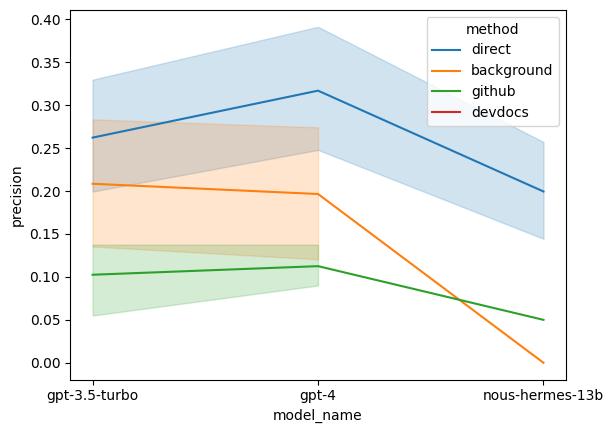

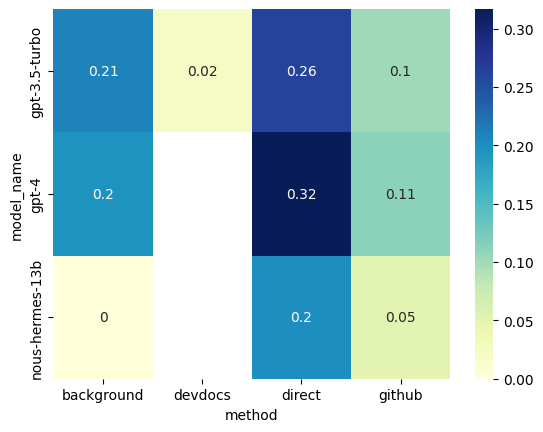

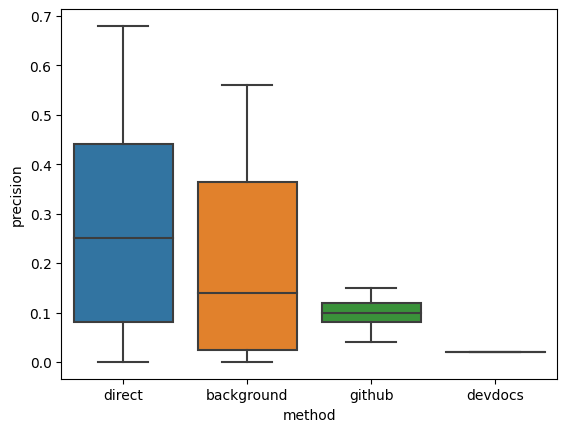

In [6]:

# Line plot for precision across different models and methods
sns.lineplot(data=df, x='model_name', y='precision', hue='method')
plt.show()

# Heatmap for precision
heatmap_data = pd.pivot_table(df, values='precision', 
                              index=['model_name'], 
                              columns='method')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.show()

# Boxplot for precision across different methods
sns.boxplot(data=df, x='method', y='precision')
plt.show()


In [7]:
from scipy import stats


def hm(task, method, df_x=None, metric="accuracy"):
    if df_x is None:
        df_x = df
    df_x = df_x.query(f"task=='{task}' and method=='{method}'")

    # Heatmap for precision
    heatmap_data = pd.pivot_table(df_x, values=metric, 
                                  index=['model_name'], 
                                  columns='ontology')
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
    plt.show()

def my_ttest(task, method):
    all_df_x = all_df.query(f"task=='{task}' and method=='{method}'")
    models = all_df_x["model_name"].unique()
    for m1 in models:
        for m2 in models:
            if m2 >= m1:
                continue
            model1_data = all_df_x[(all_df_x['model_name'] == m1)]['accuracy']
            model2_data = all_df_x[(all_df_x['model_name'] == m2)]['accuracy']

            # Step 2: Conduct the T-Test
            # Use ttest_ind to conduct the t-test
            t_statistic, p_value = stats.ttest_ind(model1_data, model2_data)

            print(f'{m1} v {m2}: len {len(model1_data)} v len {len(model2_data)}')
            print(f'{m1} v {m2}: T-statistic: {t_statistic}')
            print(f'{m1} v {m2}: P-value: {p_value}')
    
    

def lp(task, df_x=None):
    if df_x is None:
        df_x = df
    df_x = df_x.query(f"task=='{task}'")

    sns.lineplot(data=df_x, x='model_name', y='accuracy', hue='method')
    plt.show()

## Relationships Task

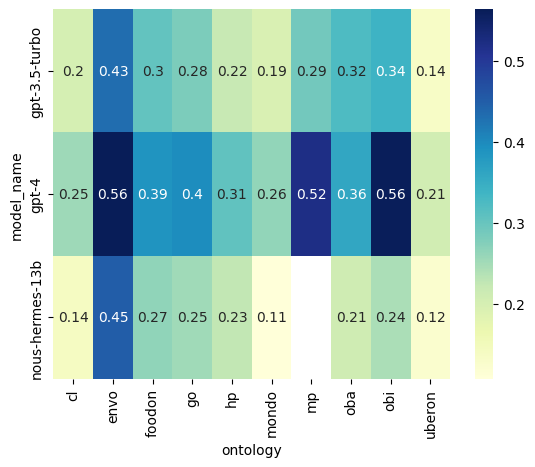

In [8]:
hm("relationships", "direct")

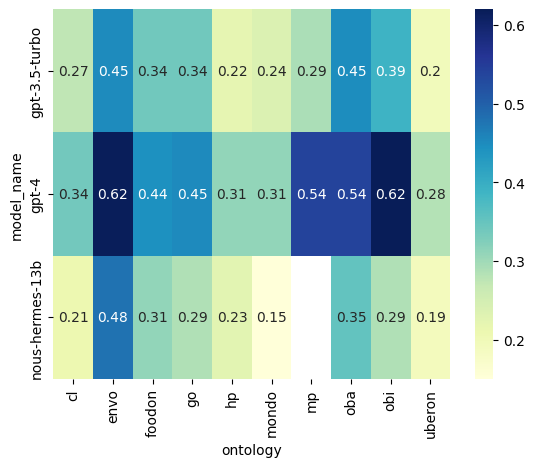

In [9]:
hm("relationships", "direct", metric="precision")

In [10]:
my_ttest("relationships", "direct")

gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 4.469214662742097
gpt-4 v gpt-3.5-turbo: P-value: 8.768353309029942e-06
nous-hermes-13b v gpt-4: len 440 v len 490
nous-hermes-13b v gpt-4: T-statistic: -6.398119575565412
nous-hermes-13b v gpt-4: P-value: 2.491651702503503e-10
nous-hermes-13b v gpt-3.5-turbo: len 440 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -2.0457235628350725
nous-hermes-13b v gpt-3.5-turbo: P-value: 0.04106505345542289


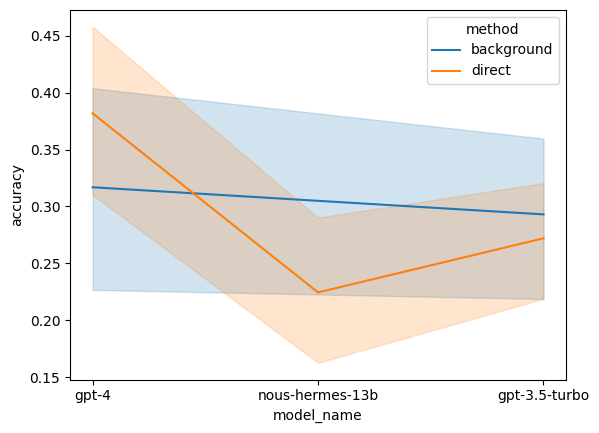

In [11]:
lp("relationships")

## Labels Task

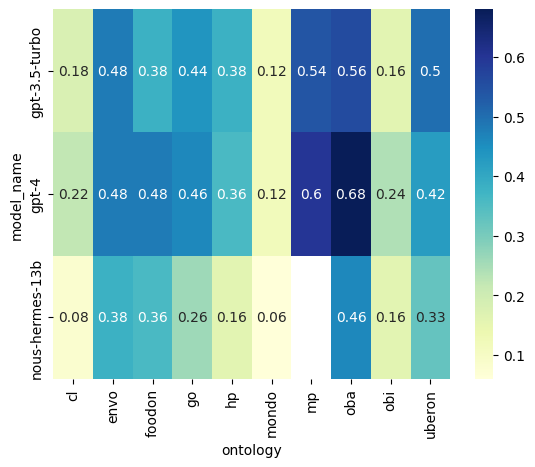

In [12]:
hm("label", "direct")

In [13]:
my_ttest("label", "direct")

nous-hermes-13b v gpt-3.5-turbo: len 440 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -4.094142196451463
nous-hermes-13b v gpt-3.5-turbo: P-value: 4.606636495700702e-05
nous-hermes-13b v gpt-4: len 440 v len 490
nous-hermes-13b v gpt-4: T-statistic: -5.192651729120633
nous-hermes-13b v gpt-4: P-value: 2.548115724097135e-07
gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 1.1135702080895775
gpt-4 v gpt-3.5-turbo: P-value: 0.2657372192236665


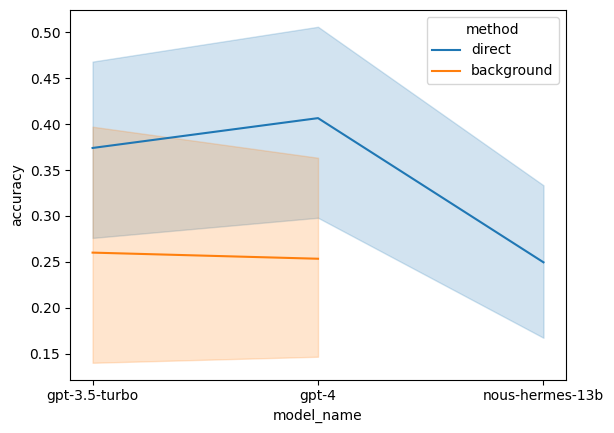

In [14]:
lp("label")

## Definitions Task

### Definitions (direct)

No additional background knowledge

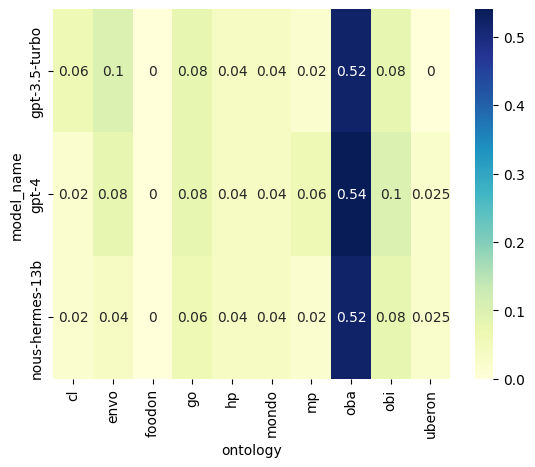

In [15]:
hm("definition", "direct")

In [16]:
my_ttest("definition", "direct")

nous-hermes-13b v gpt-4: len 490 v len 490
nous-hermes-13b v gpt-4: T-statistic: -0.7698878312632776
nous-hermes-13b v gpt-4: P-value: 0.44155234613215655
nous-hermes-13b v gpt-3.5-turbo: len 490 v len 490
nous-hermes-13b v gpt-3.5-turbo: T-statistic: -0.5553592957013923
nous-hermes-13b v gpt-3.5-turbo: P-value: 0.5787759324255379
gpt-4 v gpt-3.5-turbo: len 490 v len 490
gpt-4 v gpt-3.5-turbo: T-statistic: 0.21470784319793623
gpt-4 v gpt-3.5-turbo: P-value: 0.8300398676332532


### Definitions with github as background method

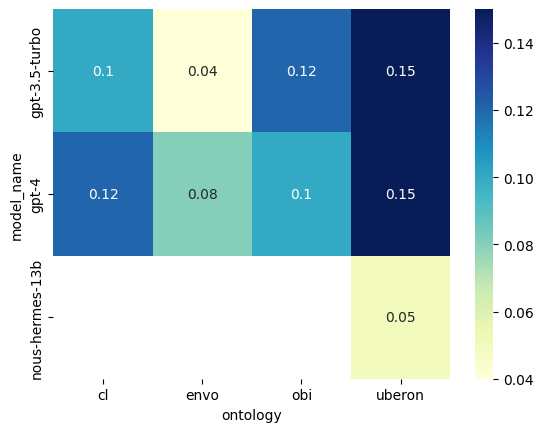

In [17]:
hm("definition", "github")

### Definitions with auto-generated background summaries

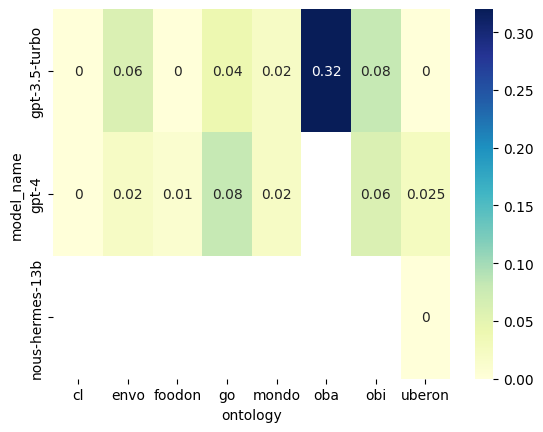

In [18]:
hm("definition", "background")

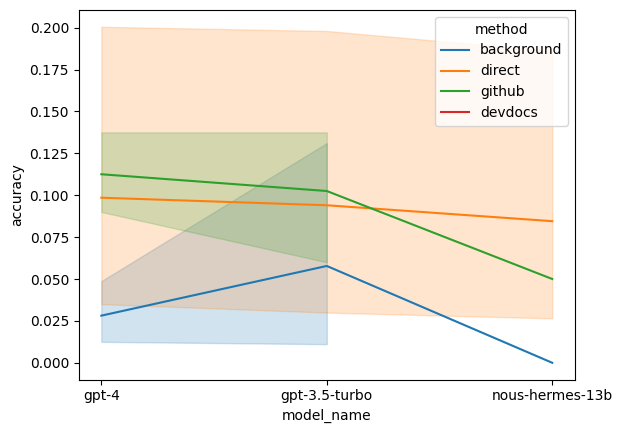

In [19]:
lp("definition")

### Definitions using developer docs

In [20]:
df.query("ontology == 'cl' and task == 'definition'")["method"].unique()

array(['background', 'github', 'direct', 'devdocs'], dtype=object)

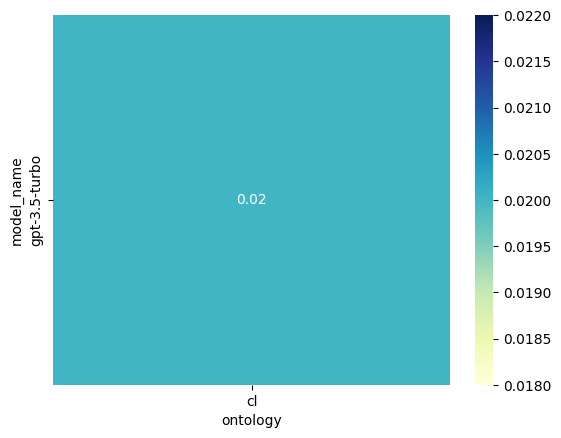

In [21]:
hm("definition", "devdocs", df.query("ontology == 'cl'"))

### Significance of different methods

In [22]:
methods = all_df["method"].unique()
models = all_df["model_name"].unique()
for m1 in methods:
    for m2 in methods:
        if m2 >= m1:
            continue
        for mn in list(models) + [None]:
            if mn is None:
                all_df_x = all_df.query("task == 'definition'")
            else:
                all_df_x = all_df.query(f"task == 'definition' and model_name == '{mn}'")
            m1_data = all_df_x[(all_df_x['method'] == m1)]['accuracy']
            m2_data = all_df_x[(all_df_x['method'] == m2)]['accuracy']

            # Step 2: Conduct the T-Test
            # Use ttest_ind to conduct the t-test
            t_statistic, p_value = stats.ttest_ind(m1_data, m2_data)

            print(f'{mn}:: {m1} v {m2}: T-statistic: {t_statistic}')
            print(f'{mn}:: {m1} v {m2}: P-value: {p_value}')


gpt-3.5-turbo:: direct v background: T-statistic: 2.0875438001560243
gpt-3.5-turbo:: direct v background: P-value: 0.03711127178139538
gpt-4:: direct v background: T-statistic: 4.235259796886408
gpt-4:: direct v background: P-value: 2.523731876866026e-05
nous-hermes-13b:: direct v background: T-statistic: 1.9328344617694948
nous-hermes-13b:: direct v background: P-value: 0.05379100430828232
None:: direct v background: T-statistic: 4.582097381577218
None:: direct v background: P-value: 4.845420315464471e-06
gpt-3.5-turbo:: direct v devdocs: T-statistic: 1.7989544413644611
gpt-3.5-turbo:: direct v devdocs: P-value: 0.07258619973428591
gpt-4:: direct v devdocs: T-statistic: nan
gpt-4:: direct v devdocs: P-value: nan
nous-hermes-13b:: direct v devdocs: T-statistic: nan
nous-hermes-13b:: direct v devdocs: P-value: nan
None:: direct v devdocs: T-statistic: 1.7829619482681742
None:: direct v devdocs: P-value: 0.07479227037204352
gpt-3.5-turbo:: github v direct: T-statistic: 0.1610926630603066

## Subsumption Analysis

Note that the relationships stats above are calculated on predicting *all* relationships.

To compare with owl2vec, we filter these for only subsumptions (subClassOf) relationships. See https://arxiv.org/pdf/2009.14654.pdf


In [23]:
import json

def subsumptions(rel_str: str):
    if pd.isnull(rel_str):
        return []
    if not isinstance(rel_str, str):
        print(f"BAD: {rel_str}")
        return []
    rels = yaml.safe_load(rel_str)
    for rel in rels:
         if "predicate" not in rel:
             print(f"BAD REL: {rel} in {rel_str}")
    return [r["target"] for r in rels if r.get("predicate", "") =="subClassOf"]

def calculate_metrics(row):
    expected_set = set(row['expected_subsumptions'])
    predicted_set = set(row['predicted_subsumptions'])
    
    TP = len(expected_set & predicted_set)
    FP = len(predicted_set - expected_set)
    FN = len(expected_set - predicted_set)
    
    # In a classical setting, TN would be calculated here. 
    # However, if you don't have information about what could have been predicted 
    # but wasn't (i.e., the universal set), TN can't be calculated.
    
    return pd.Series({'TP': TP, 'FP': FP, 'FN': FN})
    

def load_subsumption_results_tsv(f):
    res = pd.read_csv(f, comment="#", sep="\t")
    res['expected_subsumptions'] = res.apply(lambda row : subsumptions(row['expected_relationships']), axis = 1)
    res['predicted_subsumptions'] = res.apply(lambda row : subsumptions(row['predicted_relationships']), axis = 1)
    metrics_df = res.apply(calculate_metrics, axis=1)

    # Add the metrics as new columns to the original DataFrame
    df_with_metrics = pd.concat([df, metrics_df], axis=1)

    # Calculate Accuracy per row: (TP + TN) / (TP + TN + FP + FN)
    # Since we can't calculate TN here, we'll omit it from the formula
    df_with_metrics['accuracy'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'] + df_with_metrics['FN'])
    df_with_metrics['precision'] = df_with_metrics['TP'] / (df_with_metrics['TP'] + df_with_metrics['FP'])

    return df_with_metrics
    

res = load_subsumption_results_tsv("results/ont_uberon-Prelationships-Mid.original_id-BGFalse-TrNone-Te40-Mgpt-4-EMopenai.results.tsv")
res.describe(include="all")

,model_name,embedding_model_name,generate_background,task_started,task_finished,executed_on,agent,extractor,method,source_db_path,...,specificity,true_positives,true_negatives,false_positives,false_negatives,task,ontology,TP,FP,FN
count,142,142,142,142,142,142,142,142,142,142,...,142.0,142.000000,142.0,142.000000,142.000000,142,142,40.000000,40.000000,40.000000
unique,3,1,2,142,142,1,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,3,10,NaN,NaN,NaN
top,gpt-3.5-turbo,openai:,False,2023-09-04 13:31:12.160393,2023-09-04 13:32:28.413164,Darwin-21.6.0-Darwin Kernel Version 21.6.0: Mo...,dae,BasicExtractor,direct,db,...,NaN,NaN,NaN,NaN,NaN,definition,cl,NaN,NaN,NaN
freq,58,142,98,1,1,142,142,142,88,142,...,NaN,NaN,NaN,NaN,NaN,58,18,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,15.154930,0.0,44.619718,41.056338,NaN,NaN,0.300000,0.675000,0.950000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.005215,0.0,19.888959,14.984046,NaN,NaN,0.464095,0.525625,0.714322
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.0,0.000000,8.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.000000,0.0,34.000000,31.250000,NaN,NaN,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,12.500000,0.0,42.000000,40.000000,NaN,NaN,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,26.000000,0.0,47.000000,47.000000,NaN,NaN,1.000000,1.000000,1.000000


In [24]:
res["accuracy"].mean()

0.25

In [25]:
def load_all_results_subsumptions():
    files = glob.glob("results/*.results.yaml")
    objs = []
    for f in files:
        obj = load_results(f)
        if obj["task"] != "relationships":
            continue
        accuracy = load_subsumption_results_tsv(f.replace(".yaml", ".tsv"))["accuracy"].mean()
        obj["accuracy"] = accuracy
        objs.append(obj)
    return objs

objs = load_all_results_subsumptions()

BAD REL: {'predictive': 'subClassOf', 'target': 'TransitionalEpithelialCell'} in [{'predicate': 'PartOf', 'target': 'Urothelium'}, {'predictive': 'subClassOf', 'target': 'TransitionalEpithelialCell'}]
BAD REL: {'predictor': 'hasCausalAgent', 'effect': 'increased hunger, malnutrition and consequent mortality'} in [{'predicate': 'subClassOf', 'target': 'AnthropogenicEnvironmentalProcess'}, {'predictor': 'hasCausalAgent', 'effect': 'increased hunger, malnutrition and consequent mortality'}]
BAD REL: {'predictive': 'subClassOf', 'target': 'Iris'} in [{'predicate': 'PartOf', 'target': 'CameraTypeEye'}, {'predictive': 'subClassOf', 'target': 'Iris'}]


### Main subsumption results

In [26]:
subs_df = pd.DataFrame(objs)

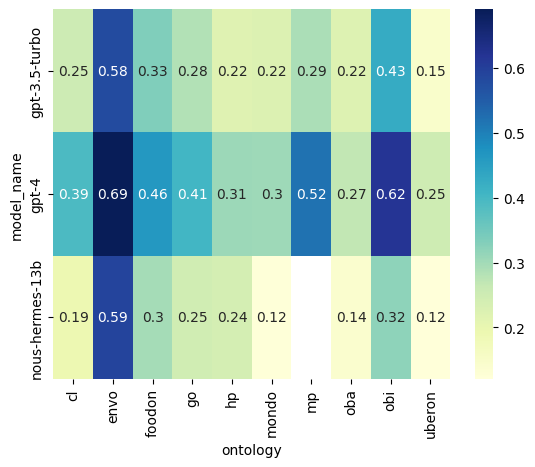

In [27]:
hm("relationships", "direct", subs_df)

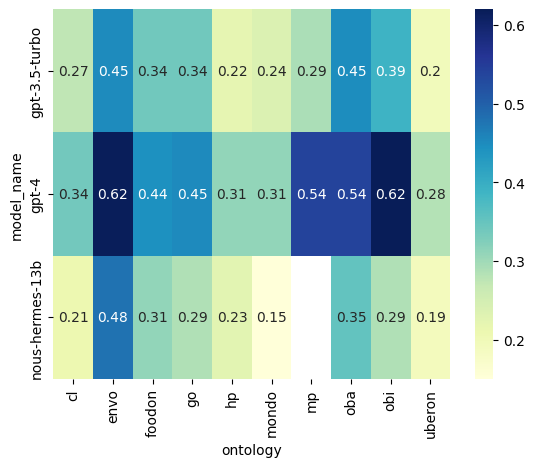

In [28]:
hm("relationships", "direct", subs_df, metric="precision")

### Subsumptions using background

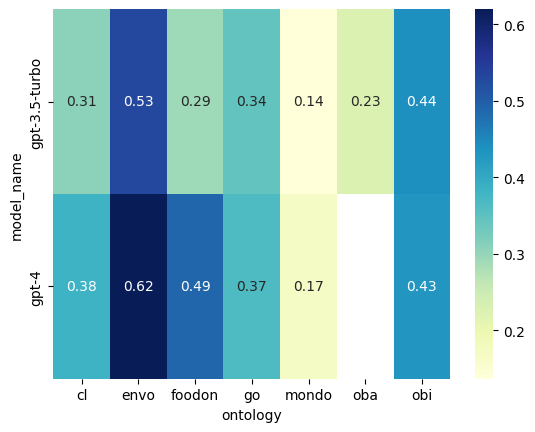

In [29]:
hm("relationships", "background", subs_df)

### Subsumptions using github

In [30]:
#hm("relationships", "github", subs_df)

## Preparing definitions for evaluation

In [31]:
defs_df = all_df.query("task == 'definition'")
defs_df.groupby('ontology').size().reset_index(name='count')

,ontology,count
0,cl,400
1,envo,350
2,foodon,350
3,go,250
4,hp,150
5,mondo,250
6,mp,150
7,oba,200
8,obi,350
9,uberon,360


In [32]:
len(defs_df)

2810

In [33]:
len(defs_df["expected_definition"].unique())

433

In [44]:

df_defs_gpt_direct = pd.read_csv("results/cl-defs-direct.tsv", sep="\t")
gpt_direct = { row["id"]: row["definition"] for _, row in df_defs_gpt_direct.iterrows() }
objs = []
for _, row in defs_df.iterrows():
    id = row["masked_original_id"]
    if id not in gpt_direct:
        continue
    row = {**row}
    row["predicted_definition"] = gpt_direct[id]
    row["model_name"] = "gpt-4"
    row["method"] = "no_RAG"
    del gpt_direct[id]
    objs.append(row)
all_defs_df = pd.concat([defs_df, pd.DataFrame(objs)])
all_defs_df

,masked_id,expected_label,feature_definition,feature_aliases,feature_relationships,feature_logical_definition,masked_original_id,predicted_label,metric_precision,metric_recall,...,task,ontology,method,model_name,accuracy,feature_label,expected_relationships,predicted_relationships,expected_definition,predicted_definition
0,PignutHickoryNut,NaN,NaN,NaN,"[{'predicate': 'InTaxon', 'target': 'CaryaGlab...","[{'predicate': 'rdfs:subClassOf', 'target': 'C...",FOODON:00004448,NaN,0.0,0.0,...,definition,foodon,background,gpt-3.5-turbo,0.0,pignut hickory nut,NaN,NaN,A whole hickory nut from a pignut hickory tree...,A caryopsis fruit of a pignut hickory tree (Ca...
1,GreekYogurt,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Strain...",NaN,FOODON:00004409,NaN,0.0,0.0,...,definition,foodon,background,gpt-3.5-turbo,0.0,greek yogurt,NaN,NaN,NaN,Greek yogurt is a type of yogurt that is made ...
2,TurkeyMeat_ground_sauteed_,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Turkey...",NaN,FOODON:00004417,NaN,0.0,0.0,...,definition,foodon,background,gpt-3.5-turbo,0.0,"turkey meat (ground, sauteed)",NaN,NaN,Ground turkey meat which has been sauteed.,Ground sautéed turkey meat is a specific type ...
3,Raw,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'FoodOb...",NaN,FOODON:00004348,NaN,0.0,0.0,...,definition,foodon,background,gpt-3.5-turbo,0.0,raw,NaN,NaN,"A characteristic of an animal, plant, fungi or...",NaN
4,SpeltFoodProduct,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'WheatF...",NaN,FOODON:00004434,NaN,0.0,0.0,...,definition,foodon,background,gpt-3.5-turbo,0.0,spelt food product,NaN,NaN,A food product made from spelt wheat.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,IntermediateCellOfUrothelium,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Urothe...",NaN,CL:4030055,NaN,0.0,0.0,...,definition,cl,no_RAG,gpt-4,0.0,intermediate cell of urothelium,NaN,NaN,A urothelial cell that is part of the regenera...,An intermediate cell of urothelium is a transi...
42,LungPerichondrialFibroblast,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Fibrob...","[{'predicate': 'rdfs:subClassOf', 'target': 'P...",CL:4033026,NaN,0.0,0.0,...,definition,cl,no_RAG,gpt-4,0.0,lung perichondrial fibroblast,NaN,NaN,A perichondrial fibroblast that is part of the...,A lung perichondrial fibroblast is a type of f...
43,DiffuseBipolar1Cell,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'OFFBip...",NaN,CL:4033027,NaN,0.0,0.0,...,definition,cl,no_RAG,gpt-4,0.0,diffuse bipolar 1 cell,NaN,NaN,An OFF diffuse bipolar cell that makes synapti...,The diffuse bipolar 1 cell is a specialized ty...
44,ChorionicGirdleCell,NaN,NaN,NaN,"[{'predicate': 'subClassOf', 'target': 'Chorio...",NaN,CL:4040001,NaN,0.0,0.0,...,definition,cl,no_RAG,gpt-4,0.0,chorionic girdle cell,NaN,NaN,"A horse-specific, highly invasive trophoblast ...",A chorionic girdle cell is a specialized type ...


In [45]:

n = 0
objs = []
defns = {}
hiddens = []
for _, row in all_defs_df.sort_values(by=["masked_original_id", "predicted_definition"]).iterrows():
    for k in ["predicted_definition", "expected_definition"]:
        is_original = k=="expected_definition"
        defn = row[k]
        if not isinstance(defn, str):
            continue
        if not defn:
            continue
        if is_original and defn in defns:
            continue
        try:
            rels = yaml.safe_load(row["feature_relationships"])
        except:
            # print(row["feature_relationships"])
            rels = []
        n += 1
        obj = {
            "ontology": row["ontology"],
            "label": row["feature_label"],
            "definition": defn.replace("\n", " ").replace("\t", " "),
            "internal_id": n,
            "accuracy": "",
            "internal_consistency": "",
            "score": "",
            "confidence": "",
            "notes": "",
            "is_a": " | ".join([r.get("target", "") for r in rels if r.get("predicate", "") == "subClassOf"]),
            "relationships": " | ".join([str(r) for r in rels if r.get("predicate", "") != "subClassOf"]),
        }
        hidden = {**obj, "is_original": is_original, **row}
        hiddens.append(hidden)
        if defn in defns:
            continue
        defns[defn] = True
        objs.append(obj)
        
eval_defs_df = pd.DataFrame(objs)
eval_defs_df.to_csv("definitions-sheets/definitions-src.tsv", sep="\t", index=False)
hiddens_df = pd.DataFrame(hiddens)
hiddens_df.to_csv("definitions-sheets/key.tsv", sep="\t", index=False)

In [46]:
hiddens_df.groupby(['ontology', 'is_original']).size().reset_index(name='count')

,ontology,is_original,count
0,cl,False,444
1,cl,True,46
2,envo,False,281
3,envo,True,47
4,foodon,False,241
5,foodon,True,34
6,go,False,224
7,go,True,48
8,hp,False,143
9,hp,True,47
